In [1]:
import streamlit as st
import folium
import pandas as pd
import numpy as np
import os

In [2]:
df_weather = pd.read_csv("compiled_data.csv", compression='gzip')

/Users/aarondavis/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,26,27,29,30,35,36,38,40,41,43,44,49,50,56,57,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_gas = pd.read_csv("annual-co2-emissions-per-country.csv")

In [4]:
df_gas.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256


In [5]:
df_weather.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968971 entries, 0 to 1968970
Data columns (total 72 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   BEGIN_YEARMONTH     int64  
 2   BEGIN_DAY           int64  
 3   BEGIN_TIME          int64  
 4   END_YEARMONTH       int64  
 5   END_DAY             int64  
 6   END_TIME            int64  
 7   EPISODE_ID_x        float64
 8   EVENT_ID            int64  
 9   STATE               object 
 10  STATE_FIPS          float64
 11  YEAR                int64  
 12  MONTH_NAME          object 
 13  EVENT_TYPE          object 
 14  CZ_TYPE             object 
 15  CZ_FIPS             int64  
 16  CZ_NAME             object 
 17  WFO                 object 
 18  BEGIN_DATE_TIME     object 
 19  CZ_TIMEZONE         object 
 20  END_DATE_TIME       object 
 21  INJURIES_DIRECT     int64  
 22  INJURIES_INDIRECT   int64  
 23  DEATHS_DIRECT       int64  
 24  DEATHS_INDIRECT     int6

In [7]:
# df_weather.drop(columns = ["FATALITY_LOCATION", "BEGIN_AZIMUTH", "BEGIN_LOCATION", 
#                            "CATEGORY", "EVENT_YEARMONTH", "FATALITY_AGE", "FATALITY_DATE", 
#                            "FATALITY_ID", "FATALITY_SEX", "FATALITY_TYPE", "FAT_DAY", 
#                            "FAT_TIME", "FAT_YEARMONTH", "END_AZIMUTH", "END_LOCATION", 
#                            "EPISODE_ID", "EPISODE_NARRATIVE", "EVENT_NARRATIVE", 
#                            "FLOOD_CAUSE", "MAGNITUDE_TYPE", "SOURCE", "TOR_OTHER_CZ_FIPS", 
#                            "TOR_OTHER_CZ_NAME", "TOR_OTHER_CZ_STATE", 
#                            "TOR_OTHER_WFO", "WFO", "END_LAT", "END_LON", "TOR_F_SCALE", 
#                            "MONTH_NAME"], inplace = True)

In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968971 entries, 0 to 1968970
Data columns (total 72 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   BEGIN_YEARMONTH     int64  
 2   BEGIN_DAY           int64  
 3   BEGIN_TIME          int64  
 4   END_YEARMONTH       int64  
 5   END_DAY             int64  
 6   END_TIME            int64  
 7   EPISODE_ID_x        float64
 8   EVENT_ID            int64  
 9   STATE               object 
 10  STATE_FIPS          float64
 11  YEAR                int64  
 12  MONTH_NAME          object 
 13  EVENT_TYPE          object 
 14  CZ_TYPE             object 
 15  CZ_FIPS             int64  
 16  CZ_NAME             object 
 17  WFO                 object 
 18  BEGIN_DATE_TIME     object 
 19  CZ_TIMEZONE         object 
 20  END_DATE_TIME       object 
 21  INJURIES_DIRECT     int64  
 22  INJURIES_INDIRECT   int64  
 23  DEATHS_DIRECT       int64  
 24  DEATHS_INDIRECT     int6

In [9]:
df_weather.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

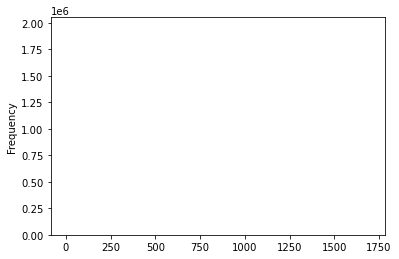

In [10]:
df_weather["INJURIES_DIRECT"].plot.hist(bins = 1000)

In [11]:

df_weather.rename(columns = {"BEGIN_LAT": "latitude", "BEGIN_LON": "longitude"}, inplace = True)

In [12]:
df_weather.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH
0,0,195004,28,1445,195004,28,1445,NaN,10096222,OKLAHOMA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,195004,29,1530,195004,29,1530,NaN,10120412,TEXAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,195007,5,1800,195007,5,1800,NaN,10104927,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,195007,5,1830,195007,5,1830,NaN,10104928,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,195007,24,1440,195007,24,1440,NaN,10104929,PENNSYLVANIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:


# df_weather["BEGIN_DATE_TIME"] = df_weather["BEGIN_DATE_TIME"].replace('', np.nan)

# df_weather["BEGIN_DATE_TIME"] = df_weather["BEGIN_DATE_TIME"].apply(lambda x: x[:-12])

# df_weather["BEGIN_DATE_TIME"] = pd.to_datetime(df_weather["BEGIN_DATE_TIME"], 
#                                                format = "%d-%b")

In [14]:
df_weather["BEGIN_YEARMONTH"] = pd.to_datetime(df_weather["BEGIN_YEARMONTH"], format = "%Y%m")

In [15]:
df_weather[df_weather["BEGIN_DATE_TIME"]=='']

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_YEARMONTH,FAT_DAY,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH


In [16]:
df_weather["MONTH"] = pd.DatetimeIndex(df_weather["BEGIN_YEARMONTH"]).month
df_weather["DAY"] = df_weather["BEGIN_DAY"]
df_weather["YEAR"] = pd.DatetimeIndex(pd.to_datetime(df_weather["BEGIN_YEARMONTH"], format = "%Y")).year

In [17]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968971 entries, 0 to 1968970
Data columns (total 74 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   BEGIN_YEARMONTH     datetime64[ns]
 2   BEGIN_DAY           int64         
 3   BEGIN_TIME          int64         
 4   END_YEARMONTH       int64         
 5   END_DAY             int64         
 6   END_TIME            int64         
 7   EPISODE_ID_x        float64       
 8   EVENT_ID            int64         
 9   STATE               object        
 10  STATE_FIPS          float64       
 11  YEAR                int64         
 12  MONTH_NAME          object        
 13  EVENT_TYPE          object        
 14  CZ_TYPE             object        
 15  CZ_FIPS             int64         
 16  CZ_NAME             object        
 17  WFO                 object        
 18  BEGIN_DATE_TIME     object        
 19  CZ_TIMEZONE         object        
 20  EN

In [18]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23403 entries, 0 to 23402
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Entity                23403 non-null  object
 1   Code                  20766 non-null  object
 2   Year                  23403 non-null  int64 
 3   Annual CO2 emissions  23403 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 731.5+ KB


In [19]:
# st.write(df_weather)

In [20]:
# st.map(df_weather)
df_weather.dropna(subset=["longitude", "latitude"], inplace=True)

2021-09-27 13:52:49.312 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [ ]:
#http://stackoverflow.com/questions/33575053/ddg#43713738

#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.latitude, point.longitude],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_weather.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

this_map

In [21]:
df_global_gas = df_gas.groupby("Year").sum("Annual CO2 emissions")

<AxesSubplot:xlabel='Year', ylabel='Annual CO2 emissions'>

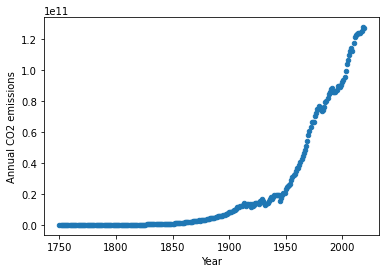

In [22]:
df_global_gas["Year"] = df_global_gas.index

df_global_gas.plot.scatter(x="Year", y="Annual CO2 emissions")

In [23]:
df_global_gas.index

Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759,
            ...
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='Year', length=270)

In [24]:
df_weather_by_year = df_weather.groupby("YEAR").count()

In [25]:
df_weather_by_year.head()

,Unnamed: 0,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,...,FAT_TIME,FATALITY_ID,FATALITY_TYPE,FATALITY_DATE,FATALITY_AGE,FATALITY_SEX,FATALITY_LOCATION,EVENT_YEARMONTH,MONTH,DAY
YEAR,,,,,,,,,,,,,,,,,,,,,
1950,223,223,223,223,223,223,223,0,223,223,...,23,23,23,23,0,0,0,23,223,223
1951,269,269,269,269,269,269,269,0,269,269,...,17,17,17,17,0,0,0,17,269,269
1952,271,271,271,271,271,271,271,0,271,271,...,36,36,36,36,0,0,0,36,271,271
1953,492,492,492,492,492,492,492,0,492,492,...,53,53,53,53,0,0,0,53,492,492
1954,609,609,609,609,609,609,609,0,609,609,...,21,21,21,21,0,0,0,21,609,609


In [26]:
df_weather_by_year["Year"] = df_weather_by_year.index

<AxesSubplot:xlabel='Year', ylabel='Unnamed: 0'>

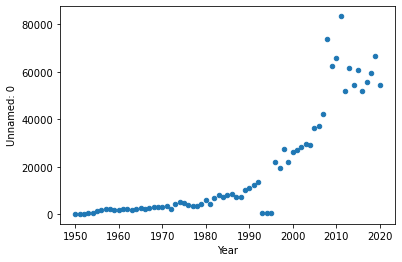

In [27]:
df_weather_by_year.plot.scatter(x="Year", y=0)

In [28]:
df_pop = pd.read_excel("county2010_hist_pops.xlsx")

In [29]:
df_pop.head()

,GISJOIN,GEOID10,STATE,COUNTY,epop1790,epop1800,epop1810,epop1820,epop1830,epop1840,...,epop1920,epop1930,epop1940,epop1950,epop1960,epop1970,epop1980,epop1990,epop2000,pop2010
0,G0100010,1001,Alabama,Autauga,0.0,0.000000,0.000000,2313.138166,6331.545705,7684.043573,...,18908.000000,19694.0,20977.0,18186.0,18739.0,24460.0,32259.0,34222.0,43671,54571
1,G0100030,1003,Alabama,Baldwin,0.0,21.678121,25.975907,646.006025,1792.315743,2262.873599,...,20730.000000,28289.0,32324.0,40997.0,49088.0,59382.0,78556.0,98280.0,140415,182265
2,G0100050,1005,Alabama,Barbour,0.0,0.000000,0.000000,428.478528,2173.344779,11163.223191,...,32067.000000,32425.0,32722.0,28892.0,24700.0,22543.0,24756.0,25417.0,29038,27457
3,G0100070,1007,Alabama,Bibb,0.0,0.000000,0.000000,2908.011697,6144.098419,7087.618146,...,23235.504196,20780.0,20155.0,17987.0,14357.0,13812.0,15723.0,16576.0,19889,22915
4,G0100090,1009,Alabama,Blount,0.0,0.000000,0.000000,1152.972992,2417.512630,4346.338687,...,25538.000000,28020.0,29490.0,28975.0,25449.0,26853.0,36459.0,39248.0,51022,57322


In [30]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GISJOIN   3143 non-null   object 
 1   GEOID10   3143 non-null   int64  
 2   STATE     3143 non-null   object 
 3   COUNTY    3143 non-null   object 
 4   epop1790  3143 non-null   float64
 5   epop1800  3143 non-null   float64
 6   epop1810  3143 non-null   float64
 7   epop1820  3143 non-null   float64
 8   epop1830  3143 non-null   float64
 9   epop1840  3143 non-null   float64
 10  epop1850  3143 non-null   float64
 11  epop1860  3143 non-null   float64
 12  epop1870  3143 non-null   float64
 13  epop1880  3143 non-null   float64
 14  epop1890  3143 non-null   float64
 15  epop1900  3143 non-null   float64
 16  epop1910  3143 non-null   float64
 17  epop1920  3143 non-null   float64
 18  epop1930  3143 non-null   float64
 19  epop1940  3143 non-null   float64
 20  epop1950  3143 non-null   floa

In [31]:
df_pop_US_by_year = df_pop[df_pop.columns[4:]]

In [32]:
years = pd.Series(range(1790, 2020, 10))

In [33]:
df_pop_US_by_year = df_pop_US_by_year.sum()

In [34]:
# https://plotly.com/python/county-choropleth/

import plotly.figure_factory as ff

import numpy as np

df_pop['FIPS'] = df_pop["GEOID10"]

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))
fips = df_pop['FIPS'].tolist()
values = df_pop['epop1790'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='USA by Unemployment %',
    legend_title='% unemployed'
)

fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

#### 